In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
dados = pd.read_csv('advertising.csv')
dados.head(5)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<AxesSubplot:>

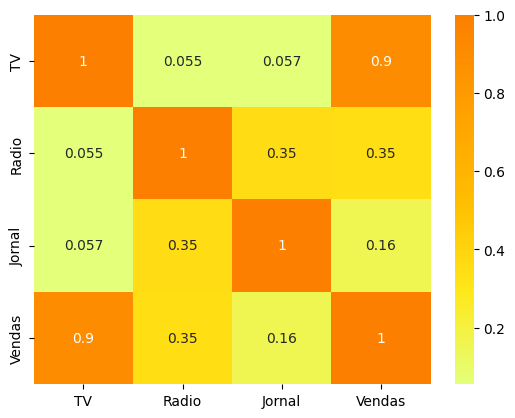

In [3]:
sns.heatmap(dados.corr(), cmap = 'Wistia', annot = True)

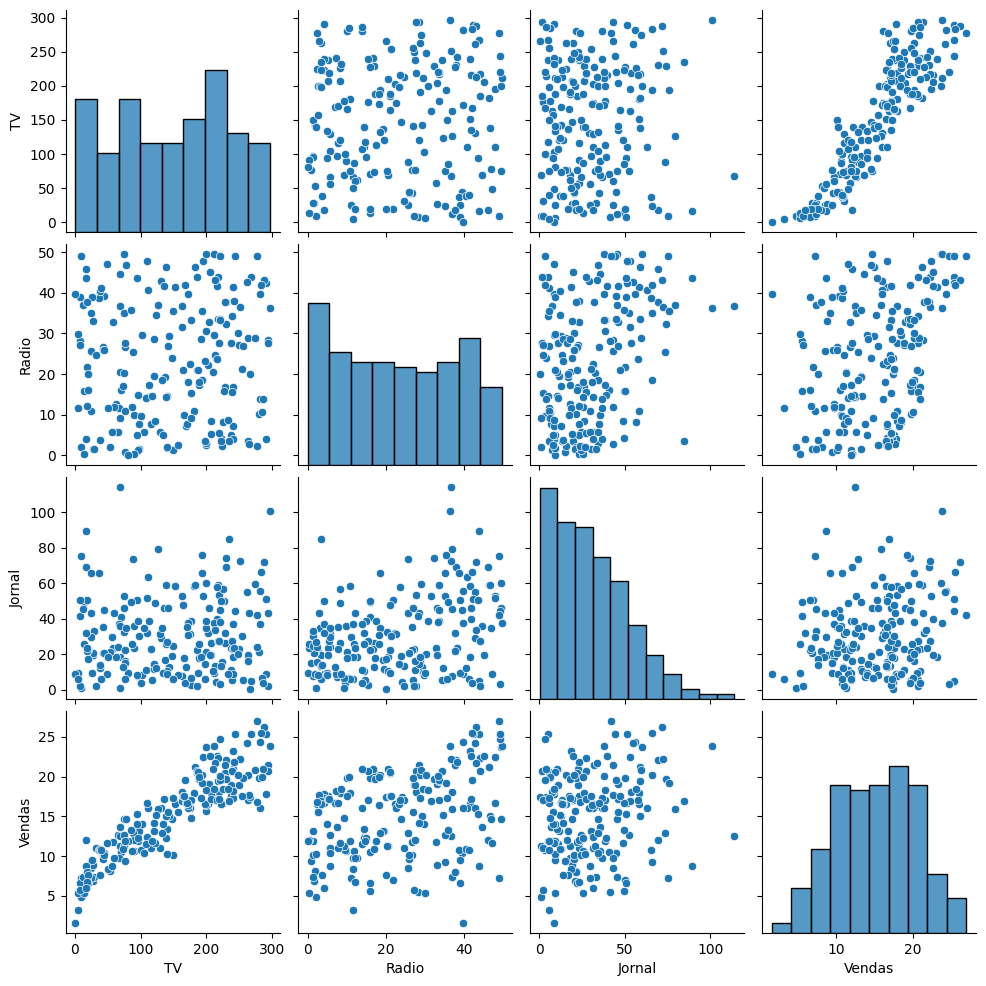

In [4]:
sns.pairplot(dados)

In [5]:
# Separando os dados em X e Y
y = dados.Vendas # A informação que eu quero desconbrir
x = dados.drop('Vendas', axis = 1) # Os dados que vou usar para descobrir o Y

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y) # aplicando o train test split
# No train teste splite as variaveis são sempre 4 variaveis e tem que ser nessa ordem

In [6]:
modelo_regresssaolinear = LinearRegression()
modelo_randonforest = RandomForestRegressor()

modelo_regresssaolinear.fit(x_treino, y_treino)
modelo_randonforest.fit(x_treino, y_treino)

RandomForestRegressor()

In [7]:
previsao_regreçaolinear = modelo_regresssaolinear.predict(x_teste)
previsao_randomforest = modelo_randonforest.predict(x_teste)

print(f' A regreção linear é de {metrics.r2_score(y_teste, previsao_regreçaolinear)} e o randon forest é de {metrics.r2_score(y_teste, previsao_randomforest)}')

 A regreção linear é de 0.876082110659917 e o randon forest é de 0.9217055789148749


<AxesSubplot:>

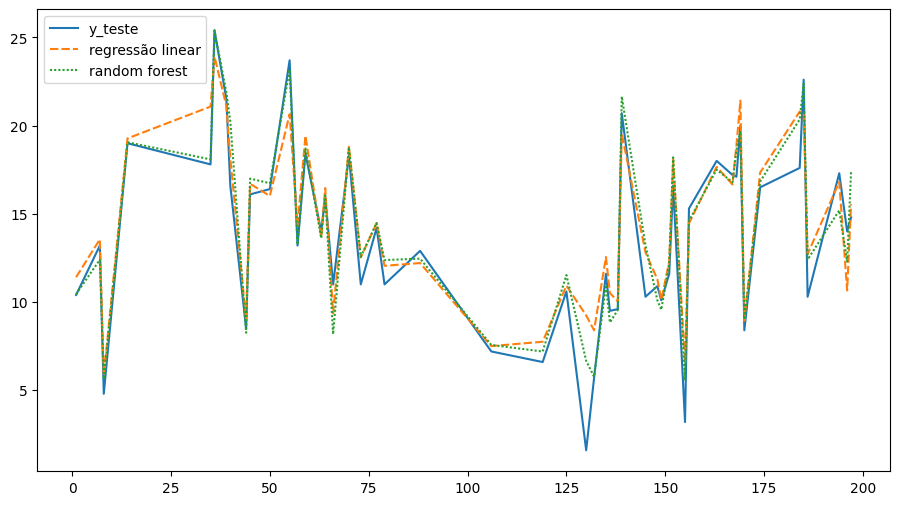

In [11]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['regressão linear'] = previsao_regreçaolinear
tabela_auxiliar['random forest'] = previsao_randomforest

plt.figure(figsize = (11, 6))
sns.lineplot(data = tabela_auxiliar)

<AxesSubplot:>

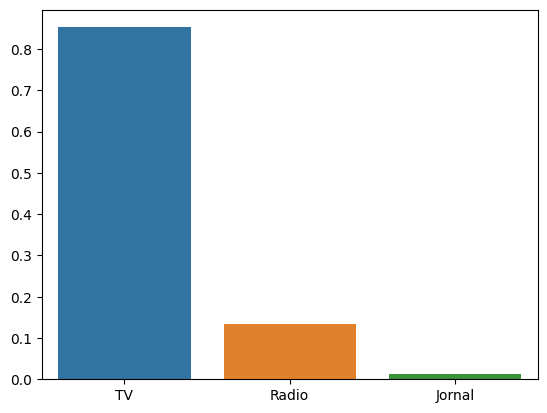

In [23]:
sns.barplot(x = x_treino.columns, y = modelo_randonforest.feature_importances_ )

In [14]:
dados_previsao = pd.read_csv('novos.csv')
dados_previsao.head(5)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [17]:
previsao = modelo_randonforest.predict(dados_previsao)
previsao

array([ 7.871,  8.209, 20.363])

<AxesSubplot:>

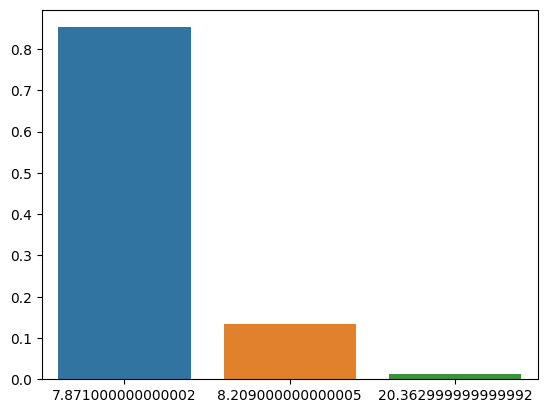

In [20]:
sns.barplot(x = previsao, y = modelo_randonforest.feature_importances_ )